<a href="https://colab.research.google.com/github/xCHMNx/Math152/blob/main/Exploration2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploration 2: The Random Walk

This exploration will be a look into an application of random numbers, known as a random walk.

To introduce the idea of a random walk, we should start with the 1 dimensional random walk. For this, we will consider a particle placed on a number line. We will use the equivalent of flipping a coin (a number generation with only two equally possible outcomes) to decide if the particle will travel 1 right or 1 to the left. 

Now we have a general idea of how a random walk works for 1 dimensions, we can use something similar for 2 dimensions. Even for 3! Hypothetically we could do 4 and even higher, but because of the nature of our universe, we don't have any way to visualize that, so it would not be as interesting.  

These random walks can be graphed visually and used to create very interesting visuals, which we will explore. 

Another thing to note is that the question of how to generate truly random numbers within our computer is a big challenge within computer science, and has effects of security and encryption systems. We may need to ask: is our random walk actually that random?

In [2]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import math

# For interactive visualization of 3D plots
import plotly.express as px
import plotly.graph_objects as go

##1 Dimensional Random Walk
The 1 dimensional random walk is fairly simple. As described above, we will assign a particle a place on a number line, and then with the "flip of a coin" decide to move it right or left. 

In [5]:
def random_walk_1d(n, steps=1000):
  #start at n and take steps number of steps, and in this example we won't have boundaries.
  x_sequence = [n]
  x = n
  for i in range(steps):
    #step either 1 or -1.
    step = np.random.choice([-1,1])
    x = x + step
    x_sequence.append(x)

  return x_sequence

####Image 1: A 1D Walk

We can make a position vs. time graph to model our particle's location. 

The function below generates such an image and returns the 1000x1000 array representing it. This can then be displayed using PIL later. The image consists of five 1D random walks starting at different locations on the number line. In the image, the horizontal axis is the time and the vertical axis is the location on the number line.

In [15]:
def generate_1D_RW_image_array(steps, filepath):
  """
  Generating function for the first image, a representation of 5 1D random walks.
  Returns a 1000x1000 pixel numpy array representation of the image.
  """
  x1 = random_walk_1d(0, steps)
  x2 = random_walk_1d(15, steps)
  x3 = random_walk_1d(30, steps)
  x4 = random_walk_1d(-15, steps)
  x5 = random_walk_1d(-30, steps)

  fig = plt.figure(figsize=(10, 10))

  ax = plt.axes([0.,0.,1.,1.])
  ax.axis("off")

  fig.patch.set_facecolor("black")
  plt.plot(x1, color="red")
  plt.plot(x2, color="blue")
  plt.plot(x3, color="green")
  plt.plot(x4, color="purple")
  plt.plot(x5, color="yellow")
  plt.savefig(filepath, dpi=100, facecolor=fig.get_facecolor(), edgecolor='none')
  plt.close()
  image = Image.open(filepath)
  return np.asarray(image)


In [23]:
# Generate the first image
RW_1D_array = generate_1D_RW_image_array(750, "1D_RW.png")
print(RW_1D_array.shape)

(1000, 1000, 4)


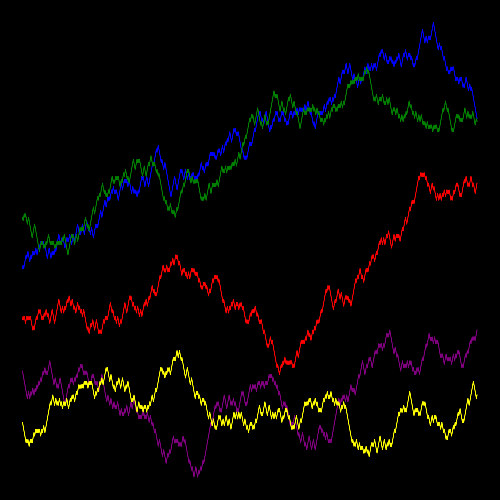

In [24]:
# The image we just generated, displayed smaller
display(Image.fromarray(RW_1D_array).resize((500, 500), resample=0))

We will use matplotlib in order to make a graph that will show us a what 1 dimensional location our particle spent the most time on its random walk.

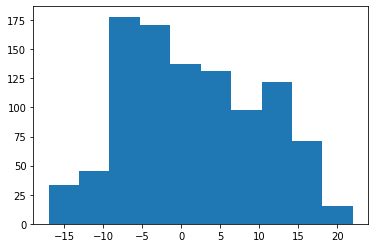

In [ ]:
def plot_random_walk_1d(x_values):
  plt.hist(x_values)
  plt.show()
plot_random_walk_1d(random_walk_1d())

Unsurprisingly, it is quite variable. This can be run any number of times to explore where the particle will spend the most time, but the only clear thing we can see is that it generally tends to stay around its starting point (as in, it is very unlikely to see our particle above 80 or below 20.)

Distance from the origin at our final point  can tell us a lot about the function. We will look at average distance at the end point of a number of different random walks. 

In [ ]:
x_0 = 0
x_fs = []
for i in range(0, 101):
  x_fs.append(random_walk_1d()[100])

print("The average distance from the origin is: ", sum(x_fs)/len(x_fs))

The average distance from the origin is:  -1.0495049504950495


We can see that the distance between the origin and the final position is almost the same as the initial. Interestingly, within our list of distances, there are some very large and very small values, but the average seems to be close to the initial point. This is a reassuring sign that our random walk does seem to be random. 

##2 Dimensional Random Walk
The idea of a 2D random walk is not super different from the idea of 1D. 

### Rigid Walks

In [ ]:
#This function will make a more rigid random walk, we will take each a step in 1 or eight directions.
#(1,1), (-1,1), (1,-1),(-1,-1)
def rigid_random_walk(x, y, iterations):
  x_sequence = [x]
  y_sequence = [y]
  position = [[x,y]]
  for i in range(iterations):
    x_next = np.random.choice([-1,1])
    y_next = np.random.choice([-1,1])
    
    x = x + x_next
    y = y + y_next 
    
    x_sequence.append(x)
    y_sequence.append(y)

  return x_sequence, y_sequence

In [ ]:
rigid_random_walk(0,0,20)

([0, 1, 0, -1, 0, -1, -2, -1, 0, 1, 2, 1, 0, -1, 0, -1, 0, 1, 2, 1, 2],
 [0, 1, 0, 1, 2, 3, 2, 3, 2, 1, 0, 1, 0, -1, 0, 1, 2, 3, 2, 1, 2])

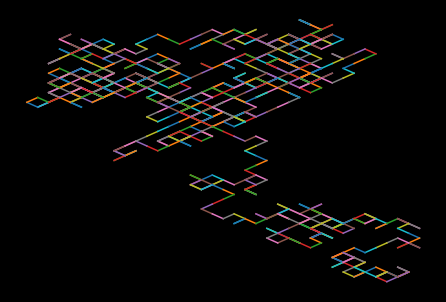

In [ ]:
x, y = rigid_random_walk(0,0,1000) 

fig = plt.figure()


ax = plt.axes([0.,0.,1.,1.])
ax.axis("off")

color_0=np.array([255, 0, 0])
color_1=np.array([0, 0, 255])


for j in range(len(x)-1):
    segment_color = ((color_1-color_0)/len(x))*j + color_0
    ax.plot([x[j], x[j+1]], [y[j], y[j+1]])

fig.patch.set_facecolor("black")
plt.show()

Again it will be interesting to see what the average distance from the origin is, when our particle has reached its final state. 

In [ ]:
x_0, y_0 = 0, 0
distances = []
x_fs, y_fs = [], []
for i in range(0, 101):
  x, y = rigid_random_walk(x_0,y_0,100)
  x_fs.append(x[-1]), y_fs.append(y[-1]) 
  distances.append(math.sqrt(x_fs[i]**2 + y_fs[i]**2))
print("The average distance from the origin is: ", sum(distances)/len(distances))

The average distance from the origin is:  11.7216285397907


Now we can modify this in order to give us a greater variation of directions walked. We will make it so that our particle can choose to stay still in the x or y directions.

In [10]:
def rigid_random_walk_v2(x,y,iterations):
  x_sequence = [x]
  y_sequence = [y]
  position = [[x,y]]
  for i in range(iterations):
    x_next = np.random.choice([-1,0,1])
    y_next = np.random.choice([-1,0,1])
    
    x = x + x_next
    y = y + y_next 
    
    x_sequence.append(x)
    y_sequence.append(y)

  return x_sequence, y_sequence

#### Image 2: A Rigid 2D Walk

Below is the generating function for our second image, the rigid random walk in 2D. 

In [20]:
def generate_2D_Rigid_RW_array(x_0, y_0, iterations, filepath):
  """
  Generating function for the second image, a rigid random walk in two dimensions
  Returns a 1000x1000 pixel numpy array representation of the image.
  """
  x, y = rigid_random_walk_v2(x_0, y_0, iterations) 

  fig = plt.figure(figsize=(10, 10))

  ax = plt.axes([0.,0.,1.,1.])
  ax.axis("off")

  for j in range(len(x)-1):
      ax.plot([x[j], x[j+1]], [y[j], y[j+1]])

  fig.patch.set_facecolor("black")
  plt.savefig(filepath, dpi=100, facecolor=fig.get_facecolor(), edgecolor='none')
  plt.close()
  image = Image.open(filepath)
  return np.asarray(image)

In [21]:
# Generate the second image
rigid_array = generate_2D_Rigid_RW_array(0, 0, 1000, "2D_Rigid_RW.png")
print(rigid_array.shape)

(1000, 1000, 4)


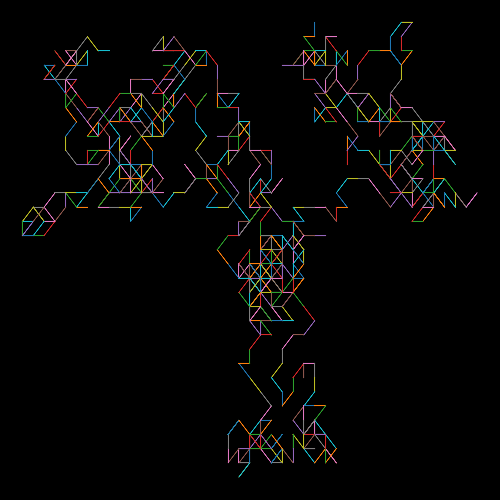

In [22]:
# The image we just generated, displayed smaller
display(Image.fromarray(rigid_array).resize((500, 500), resample=0))

The outputs here, with another degree of freedom, lend to seeing a number of new patterns, which are not all as grid-like as the previous rigid random walk. In our previous graphs, it was impossible for a triangle shape to appear, as that would require movement in the purely x or purely y direction.

### Analyzing Distances of Rigid Walks

Let's now look at the average distance the endpoints of 100 different random walks are from the origin.

In [ ]:
x_0, y_0 = 0, 0
distances = []
x_fs, y_fs = [], []
for i in range(0, 101):
  x, y = rigid_random_walk_v2(x_0,y_0,100)
  x_fs.append(x[-1]), y_fs.append(y[-1]) 
  distances.append(math.sqrt(x_fs[i]**2 + y_fs[i]**2))
print("The average distance from the origin is: ", sum(distances)/len(distances))

The average distance from the origin is:  9.522055044855735


Now, to add another degree of randomness to our program, we are going to modify it so that it will take steps of different sizes. For our example, we are going to make it take steps of intiger sizes between 1 and 10, but one could also make it take fractional little steps as well. 

In [ ]:
def rigid_walk_diff_step(x, y, iterations):
  x_sequence = [x]
  y_sequence = [y]
  position = [[x,y]]
  for i in range(iterations):
    x_next = np.random.choice(range(-10,10))
    y_next = np.random.choice(range(-10,10))
    
    x = x + x_next
    y = y + y_next 
    
    x_sequence.append(x)
    y_sequence.append(y)

  return x_sequence, y_sequence

Let's see the distance with random step size. This value is much larger than the others. 

In [ ]:
x_0, y_0 = 0, 0
distances = []
x_fs, y_fs = [], []
for i in range(0, 101):
  x, y = rigid_walk_diff_step(x_0,y_0,100)
  x_fs.append(x[-1]), y_fs.append(y[-1]) 
  distances.append(math.sqrt(x_fs[i]**2 + y_fs[i]**2))
print("The average distance from the origin is: ", sum(distances)/len(distances))

The average distance from the origin is:  96.5469029142566


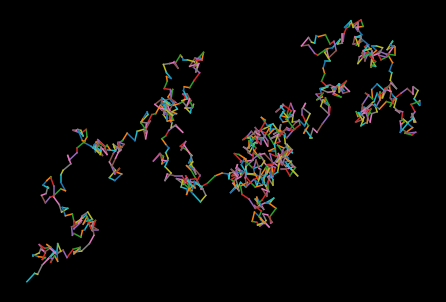

In [ ]:
x, y = rigid_walk_diff_step(0,0,1000) 

fig = plt.figure()


ax = plt.axes([0.,0.,1.,1.])
ax.axis("off")

color_0=np.array([255, 0, 0])
color_1=np.array([0, 0, 255])


for j in range(len(x)-1):
    segment_color = ((color_1-color_0)/len(x))*j + color_0
    ax.plot([x[j], x[j+1]], [y[j], y[j+1]])

fig.patch.set_facecolor("black")
plt.show()

This has definitely removed the grid like appearance of the previous functions and instead made our output far more chaotic. 

### Variations of the 2D Random Walk

We now go a step further, and allow a truly random direction for the next step. The function `random_walk_uniform` picks an angle between 0 and $2\pi$ from a uniform distribution and takes a step of size 1 in that direction. This is done by calculating the point on a unit circle using that angle and adding it to the previous point.

The first update we make to this function is to allow some influence to be applied to the random step. That is, we want to be able to make the random walk more likely to head in one direction than any other. This is done in function `random_walk_with_influence` below. We influence the walk by passing in an angle of influence, and a standard deviation. The theta angle for each step is then chosen from a normal distribution with mean at the angle of influence and the given standard deviation. Since the probability of a sample being within one standard deviation of the mean is 68% in a normal distribution, we can then control the angle range from which 68% of the random angles are chosen with the standard deviation parameter. This function allows one to direct the trend of a random walk.

Another update to this basic random walk is the function `random_walk_with_gravity`. This treats each step as a unit of time, applying a given velocity and acceleration to the position of the walk. At the same time, it also takes the same random steps. So the motion of the random walk is the combined influence of randomness and kinematics.

In [27]:
def random_walk_uniform(steps=100):
  """
  Make a random walk from the origin. Each step is entirely random with angle
  chosen from uniform distribution.
  """
  x_sequence = [0]
  y_sequence = [0]
  for i in range(steps):
    c_x, c_y = x_sequence[-1], y_sequence[-1]
    # Random theta from 0 to 2pi, uniform distribution
    theta = np.random.random()*2*np.pi
    x_sequence.append(c_x+np.cos(theta))
    y_sequence.append(c_y+np.sin(theta))
  return x_sequence, y_sequence

def random_walk_with_influence(theta_0, std, steps=100):
  """
  Make a random walk from the origin influenced in the direction
  theta_0. The standard deviation std will determine how strong the influence is.
  """
  x_sequence = [0]
  y_sequence = [0]
  for i in range(steps):
    c_x, c_y = x_sequence[-1], y_sequence[-1]
    # Get a value from a normal distribution with mean theta_0 and std scale.
    # Thus, 68% of values will be within std of the main direction theta_0
    theta = np.random.normal(loc=theta_0, scale=std)
    x_sequence.append(c_x+np.cos(theta))
    y_sequence.append(c_y+np.sin(theta))
  return x_sequence, y_sequence

def random_walk_with_gravity(theta_0, v_0, a, steps=100):
  """
  Start a random walk in direction theta_0 with velocity v_0
  and apply constant acceleration a to it, with the steps being the time step.
  Acceleration is a vector, but v_0 is just the initial speed, direction
  is given by theta_0.
  """
  x_sequence = [0]
  y_sequence = [0]
  v = v_0*np.array([np.cos(theta_0), np.sin(theta_0)])
  for i in range(steps):
    c_x, c_y = x_sequence[-1], y_sequence[-1]
    # Random walk direction
    theta = np.random.random()*2*np.pi
    # Take into account the acceleration and velocity, then one time step passes
    c_x, c_y = (c_x, c_y) + v
    v += a
    # Then take the random step of size 1
    x_sequence.append(c_x+np.cos(theta))
    y_sequence.append(c_y+np.sin(theta))
  return x_sequence, y_sequence

#### Examples

The function `plot_random_walk` allows one to plot both the random walk and the direction of influence which was used to generate it at the same time.

In [ ]:
def plot_random_walk(x_sequence, y_sequence, theta_0, title):
  fig = plt.figure(figsize=(6, 6))
  plt.plot(np.array(x_sequence), np.array(y_sequence))
  plt.scatter(x_sequence[0], y_sequence[0], c='g', label="start")
  plt.scatter(x_sequence[-1], y_sequence[-1], c='r', label='end')
  max_val = np.max(x_sequence + y_sequence)
  min_val = np.min(x_sequence + y_sequence)
  max_dist = np.max([np.sqrt(x_val**2 + y_val**2) for x_val, y_val in zip(x_sequence, y_sequence)])
  plt.plot([0, max_dist*np.cos(theta_0)], [0, max_dist*np.sin(theta_0)], alpha=0.5, linestyle="--", label="Direction of Influence")
  plt.xticks(np.linspace(-max_dist, max_dist, 10))
  plt.yticks(np.linspace(-max_dist, max_dist, 10))
  plt.title(title)
  plt.legend()
  plt.show()

Here is an example with the influenced random walk, alongside its direction of influence.

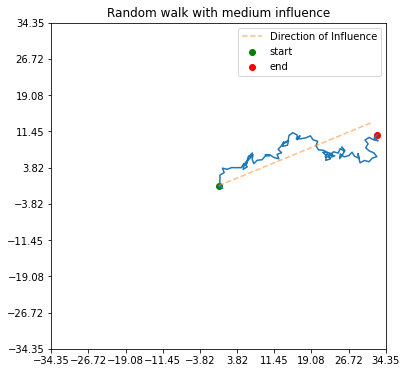

In [ ]:
theta_0 = np.random.random()*2*np.pi
x_sequence, y_sequence = random_walk_with_influence(theta_0, np.pi/2)
plot_random_walk(x_sequence, y_sequence, theta_0, "Random walk with medium influence")

Here is an example of a random walk taking into account gravity toward the bottom of the plot. It is initially fired out along the angle theta_0.

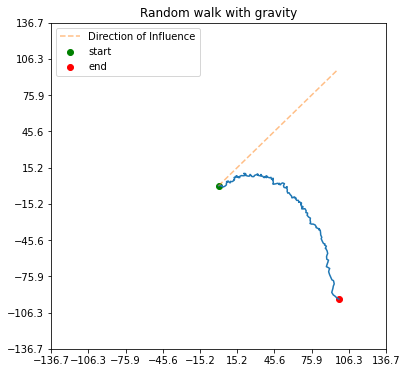

In [ ]:
theta_0 = np.pi/4
v_0 = np.sqrt(0.5)
a = np.array([0, -.01])
steps = 200
x_seq, y_seq = random_walk_with_gravity(theta_0, v_0, a, steps)
plot_random_walk(x_seq, y_seq, theta_0, "Random walk with gravity")

Random walk with gravity demo

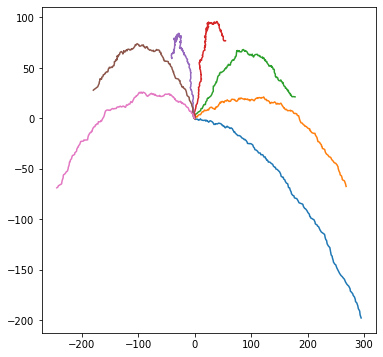

In [ ]:
thetas = np.linspace(0, np.pi, 7, endpoint=False)
# Initial speed v_0
v_0 = np.sqrt(2)
# Acceleration vector (straight down)
a = np.array([0, -.01])
# How many time steps will pass
steps = 200
fig = plt.figure(figsize=(6, 6))
for i in range(thetas.shape[0]):
  x_seq, y_seq = random_walk_with_gravity(thetas[i], v_0, a, steps)
  plt.plot(x_seq, y_seq)
plt.show()

The code below generates three examples of random walks using different strengths of influence. It generates 15 equally spaced directions of influence around the unit circle and sends one influenced walk in each direction.

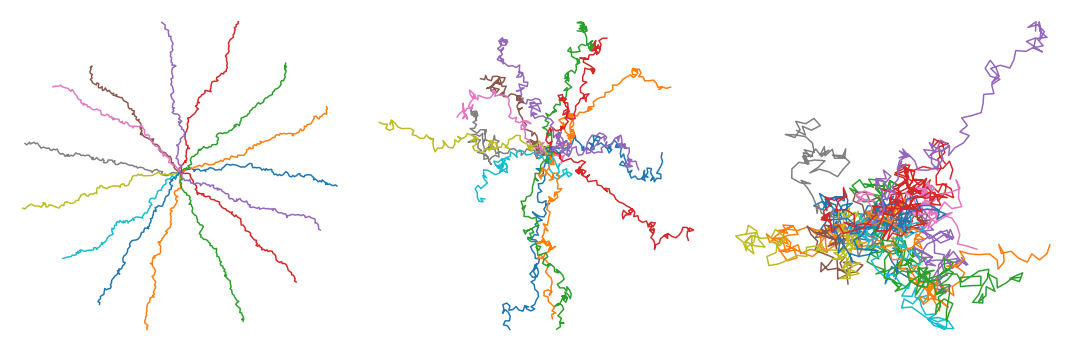

In [ ]:
thetas = np.linspace(0, 2*np.pi, 15, endpoint=False)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(15, 5)
influence_values = [np.pi/4, np.pi/2, np.pi]
for j in range(len(influence_values)):
  for i in range(thetas.shape[0]):
    x_seq, y_seq = random_walk_with_influence(thetas[i], influence_values[j])
    axes[j].plot(x_seq, y_seq)
    axes[j].axis('off')
plt.tight_layout()
#plt.savefig("RandomWalksWithInfluence.png")
plt.show()

### Radial Random Walks (Random Walks with Influence)

#### Image 3: A Radial Walk

Here we generate the second of the four images which will be combined into the final PIL image. This one shows our exploration into influencing the direction of random walks. The function below returns a 1000x1000 pixel image of the walk. To make the picture as nice as possible, we remove the border and axis from the image. The function can interpolate between colors at the start of the walk and the end to add an extra layer of color.

In [29]:
def generate_radial_random_walk(steps, thetas, influence, fig_size, bg_color, color_0, color_1, linewidth, fp = None, save_dpi=100):
  """
  Generating function for the third image, a 2D random walk with influence
  Returns numpy pixel array representing the image
  """
  fig = plt.figure(figsize=fig_size)
  # Create axes with no border and no lines
  ax = plt.axes([0., 0., 1., 1.])
  ax.axis('off')
  # Set the color of the background
  fig.patch.set_facecolor(bg_color/255)
  for i in range(thetas.shape[0]):
    x_seq, y_seq = random_walk_with_influence(thetas[i], influence, steps)
    for j in range(len(x_seq)-1):
      segment_color = ((color_1-color_0)/len(x_seq))*j + color_0
      ax.plot([x_seq[j], x_seq[j+1]], [y_seq[j], y_seq[j+1]], color=segment_color/255, linewidth=linewidth)
  # Save to filepath fp with dpi save_dpi, appropriate background color, and no edge
  plt.savefig(fp, dpi=save_dpi, facecolor=fig.get_facecolor(), edgecolor='none')
  plt.close()
  image = Image.open(fp)
  return np.asarray(image)

In [31]:
thetas = np.linspace(0, 2*np.pi, 15, endpoint=False)
influence=np.pi/3
color_0=np.array([255, 0, 0])
color_1=np.array([0, 0, 255])
bg_color = np.array([0, 0, 0])
linewidth = 4
steps = 50
# Size of 10 by 10 with 100 pixels per inch leads to a 1000x1000 image
fig_size = (10, 10)
radial_array = generate_radial_random_walk(steps, thetas, influence, fig_size, bg_color, color_0, color_1, linewidth, fp="Radial_RW.png", save_dpi=100)
print(radial_array.shape)

(1000, 1000, 4)


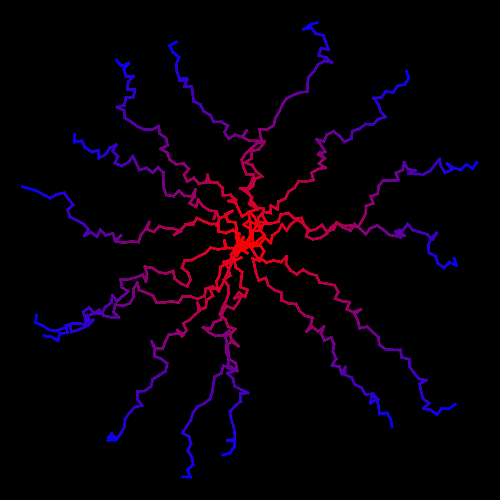

In [32]:
# The image we just generated, displayed smaller
display(Image.fromarray(radial_array).resize((500, 500), resample=0))

### 2D Branching Walks

We now try to apply even more bounds on the behavior of the random walk. Since the random walk by itself isn't particularly complex, we can introduce complexity with these bounds.

One idea we had was to see if we could replicate more natural shapes with randomness. The end result of this exploration is the function `random_walk_branching_2d` which generates random walks under the parameters given to it, with a certain probability of branching into two different random walks at each step. When it branches, each separate random walk continues to follow the same bounds.

We now explain this code in more detail. To call the function, one gives it a starting point, an initial angle with which to take the next step, a direction in which to influence the step after, and the variance of the distribution used to generate the next step. Alongside these, one gives the function the probability of branching at each step, the number of steps the function will generate, the size of each step, and the variance used to modify this step size. The reason why we have variance in the step size is so that we can add yet another element of randomness, namely the size of each step.

The complexity of this function comes in the branching. Since each branch must carry out the same behavior as the original, with another possibility of branching, the function must be recursive. That is, it will call itself at each step, and will call itself along branches. Essentially, one step will build a list consisting of the point it is connecting to, and lists containing all points connected to that point. Each step will generate the next point and the angle which will be used to generate the one after that at which point it calls the function again with those new parameters, but with 1 fewer step. By decrementing the steps, the recursion bottoms out at a depth of the original step value it was called with, and then begins to return. As the functions return, they return their connectivity lists to the previous iteration. That iteration appends the list to its list, and so on. The end result is a recursive list which can be traversed to obtain the full structure. Each point is connected to the first point in each list following it, and so on.

To make the structure more natural looking, if a branch occurs then the angles which the two branches are sent out along are more likely to be different. This causes spreading out of the branches as they form. Furthermore, the angle along which the next step is influenced is given as the previous angle which was chosen. This means that branches tend to follow a similar direction to the sections which lead to them, giving a cohesive direction to the random walk.

In [33]:
def random_walk_branching_2d(starting_point, theta_0, theta_influence, variance, p_branch, steps, step_size, step_variance):
  """
  Recursively Generate a branching 2d random walk with initial direction determined by theta_0. 
  The depth of the recursion is determined by steps. I.e. steps determines the number of steps from
  root to leaf. Variance determines the standard deviation of the normal distribution from which angles are chosen.
  p_branch is the probability of a branch occuring at each step.
  The step_size is the distance stepped at each point and the step_variance determines how much this distance changes randomly from step_size.

  Returns a recursive list structure which describes the branches coming from each point.
  """
  # Save initial point
  points = [starting_point]
  if steps == 0:
    return points
  # Does the walk branch here?
  branch = np.random.choice([0, 1], p=[1-p_branch, p_branch])
  # Take one step in direction determined by theta_0
  # Scale step size by some amount, but clamp between 0.5 and 1.5
  step_scale = np.random.normal(1, step_variance)
  if step_scale < 0.5:
    step_scale=0.5
  elif step_scale > 1.5:
    step_scale = 1.5
  next_point = starting_point + step_scale*step_size*np.array([np.cos(theta_0), np.sin(theta_0)])
  # Choose theta from normal distribution, double the variance if it branches
  theta = np.random.normal(theta_influence, (branch+1)*variance)
  # Take steps-1 steps after that randomly, with chance of branching
  points.append(random_walk_branching_2d(next_point, theta, theta, variance, p_branch, steps-1, step_size*0.9, step_variance))
  if branch:
    # Set random walk going from this location that is separate from the main one
    theta_b = np.random.normal(theta_influence, (branch+1)*variance)
    # Scale step size by some amount, but clamp between 0.5 and 1.5
    step_scale = np.random.normal(1, step_variance)
    if step_scale < 0.5:
      step_scale=0.5
    elif step_scale > 1.5:
      step_scale = 1.5
    next_point_b = starting_point + step_scale*step_size*np.array([np.cos(theta_b), np.sin(theta_b)])
    points.append(random_walk_branching_2d(next_point_b, theta_b, theta_b, variance, p_branch, steps-1, step_size*0.9, step_variance))
  return points

Generating the points which the random walk followed is just the first step. To make the structure appear, we have to parse the recursive list structure and plot the points. The functions below do that. To make the plots even more interesting, the functions are written to allow one to specify the thickness and color of the first step of the random walk, along with the thickness and color of the last steps. Then, as the structure is plotted, the line width and color of each section is interpolated based on the depth of the section between the root and the leaves. This allows pretty and interesting structures to take shape.

In [34]:
def parse_branching_walk_2d(branching_walk, axis, steps, thickness_0, thickness_1, use_custom_color, color_0, color_1, depth=0):
  """
  Parses recursive structure of the branching walk and plots the resulting tree
  """
  # Connect the point in the first position of the branch to the point at 
  # the first position of each branch leading from it
  if type(branching_walk) != list:
    return
  thickness = ((thickness_1-thickness_0)/steps)*depth + thickness_0
  if use_custom_color:
    segment_color = ((color_1-color_0)/steps)*depth + color_0
  for i in range(1, len(branching_walk)):
    #print("Connecting {} to {}".format(branching_walk[0], branching_walk[i][0]))
    x_seq = [branching_walk[0][0], branching_walk[i][0][0]]
    y_seq = [branching_walk[0][1], branching_walk[i][0][1]]
    if use_custom_color:
      # Matplotlib requires RGB values in range [0, 1]
      axis.plot(x_seq, y_seq, linewidth=thickness, color=segment_color/255)
    else:
      axis.plot(x_seq, y_seq, linewidth=thickness)
    parse_branching_walk_2d(branching_walk[i], axis, steps, thickness_0, thickness_1, use_custom_color, color_0, color_1, depth+1)

def plot_branching_walk_2d(branching_walk, title, fig_size, bg_color, steps, thickness_0, thickness_1, use_custom_color=False, color_0=None, color_1=None,
                           save=False, fp=None, save_dpi=100):
  """
  Plot the branching walk. Using the parameters save, fp, and save_dpi one can
  save images to Colab or a file.
  This function is useful to test different parameters in the plotting of a tree without generating
  a new branching walk every time.
  If one instead wants an array representation of a new branching walk, call the generation function below.
  """
  fig = plt.figure(figsize=fig_size)
  # Generate axes with no border and no lines
  ax = plt.axes([0., 0, 1, 1])
  ax.axis('off')
  # Set background color
  fig.patch.set_facecolor(bg_color/255)
  parse_branching_walk_2d(branching_walk, ax, steps, thickness_0, thickness_1, use_custom_color, color_0, color_1)
  plt.title(title)
  # Save to filepath fp with dpi save_dpi, appropriate background color, and no edge
  if save:
    plt.savefig(fp, dpi=save_dpi, facecolor=fig.get_facecolor(), edgecolor='none')
  plt.show()

#### Image 4: A Branching Walk

Here is the generating function for this image. This is the fourth of our sub-images. This function generates the points and the plot, then returns a pixel array representing the image.

In [35]:
def generate_branching_walk_array(starting_point, theta_0, theta_influence, variance, p_branch, steps, step_size, step_variance,
                                  fig_size, bg_color, thickness_0, thickness_1, use_custom_color=False, color_0=None, color_1=None,
                                  fp=None, save_dpi=100):
  """
  Generate the fourth image, a 2D branching walk.
  Returns a numpy array of pixels representing the image.
  """
  # Generate the points of the walk
  branching_walk = random_walk_branching_2d(starting_point, theta_0, theta_influence, variance, p_branch, steps, step_size, step_variance)
  # Generate the random walk plot
  fig = plt.figure(figsize=fig_size)
  # Create axes with no border and no lines
  ax = plt.axes([0., 0, 1, 1])
  ax.axis('off')
  # Set background color
  fig.patch.set_facecolor(bg_color/255)
  parse_branching_walk_2d(branching_walk, ax, steps, thickness_0, thickness_1, use_custom_color, color_0, color_1)
  # Save to filepath fp with dpi save_dpi, appropriate background color, and no edge
  plt.savefig(fp, dpi=save_dpi, facecolor=fig.get_facecolor(), edgecolor='none')
  plt.close()
  image = Image.open(fp)
  return np.asarray(image)

Below we tune the parameters of the walk and the plotting. These include the starting point, the direction we want it to grow, how closely each step should follow the previous, the probability of branching, and the details of the steps taken. The plotting parameters include the color of the background, the thickness of the branches, and the colors used in the image. The thickness and color of each branch is interpolated from the initial values and the ending values.

In [36]:
# Parameters which generate the branching walk
sp = np.array([0, 0])
theta_0 = np.pi/2
theta_influence = np.pi/2
variance = np.pi/15
p_branch = 0.5
steps = 15
step_size = 1
step_var = 0.25

# Parameters for the plotting
# color_0 colors the base, color_1 colors the leaves. I use linear interpolation between them
# Set use_custom_color to False to get a rainbow tree
# bg_color sets the color of the background
bg_color = np.array([0, 0, 0])
color_0 = np.array([225, 225, 225])
color_1 = np.array([35, 35, 35])
thickness_0=15
thickness_1=0.5
fig_size = (10, 10)
# Generate image array
# With 10 inch square and 100 dpi, image is 1000x1000 pixels
branching_array = generate_branching_walk_array(sp, theta_0, theta_influence, variance, p_branch, steps, step_size, step_var,
                                                fig_size, bg_color, thickness_0, thickness_1, use_custom_color=True, color_0=color_0, color_1=color_1,
                                                fp="2DBranchingRW.png", save_dpi=100)
print(branching_array.shape)

(1000, 1000, 4)


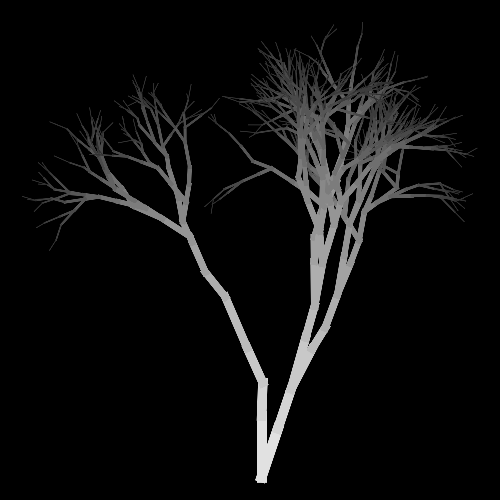

In [37]:
# The image we just generated, displayed smaller
display(Image.fromarray(branching_array).resize((500, 500), resample=0))

## 3 Dimensional Random Walks

We wanted to extend the work we had done with random walks into three dimensional space. The underlying principles are the same behind these walks, but in addition to x and y, they also generate z values.

The simple case is just the 3D equivalent of the uniform 2D random walk. In the function below, we randomly choose a theta and phi value so as to generate a new point on the unit sphere centered at the previous point. To do this, we use spherical coordinates, the 3D equivalent of the polar coordinates we used previously.

In [91]:
def random_walk_uniform_3d(steps):
  """
  Starting at the origin, take a random walk in 3D space with steps of length
  1. Each new point will be somewhere on the unit sphere centered at the previous point.
  Returns one list containing triples (x, y, z).
  """
  # Holds list of x, y, and z values as numpy arrays
  points = [np.array([0, 0, 0])]
  for i in range(steps):
    # Choose theta from 0 to 2pi and phi from 0 to pi from a uniform distribution
    theta = np.random.random()*2*np.pi
    phi = np.random.random()*np.pi
    current_point = points[-1]
    # Add new point on unit sphere centered at the previous
    new_point = current_point + np.array([np.cos(theta)*np.sin(phi), np.sin(theta)*np.sin(phi), np.cos(phi)])
    points.append(new_point)
  return points

In [ ]:
def plot_random_walk_3d(points, elevation, angles):
  fig = plt.figure(figsize=(15, 5))
  for i in range(len(angles)):
    ax = fig.add_subplot(1, len(angles), i+1, projection='3d')
    ax.view_init(elevation, angles[i])
    x_seq, y_seq, z_seq = [], [], []
    for j in range(len(points)):
      x_seq.append(points[j][0])
      y_seq.append(points[j][1])
      z_seq.append(points[j][2])
    ax.plot3D(np.array(x_seq), np.array(y_seq), np.array(z_seq))
    ax.scatter3D(x_seq[0], y_seq[0], z_seq[0], c='g', label="start")
    ax.scatter3D(x_seq[-1], y_seq[-1], z_seq[-1], c='r', label='end')
  
  plt.legend()
  plt.show()

In [92]:
points = random_walk_uniform_3d(100)
#print(points[:5])

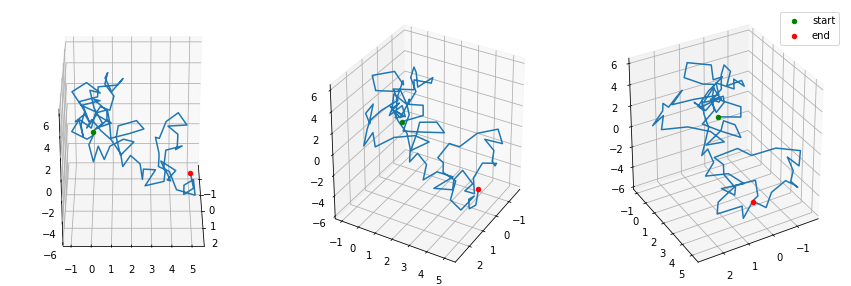

In [ ]:
# Using matplotlib to show multiple angles of a 3D random walk
angles = np.array([0, 30, 60])
plot_random_walk_3d(points, 30, angles)

### 3D Branching walks

The code for the 3D branching walk is very similar to the code used to generate the 2D branching walks. The only real differences are in the generation of new points. That is, instead of generating points using polar coordinates, we do so using spherical coordinates. The recursive structure and logic directly transfer.

In [ ]:
def random_walk_branching_3d(starting_point, theta_0, phi_0, phi_influence, theta_influence, variance, p_branch, steps, step_size, step_variance):
  """
  Recursively generate a branching 3d random walk with initial direction determined by theta_0
  and phi_0. The depth of the recursion is determined by steps. I.e. steps determines the number of steps from
  root to leaf. Variance determines the standard deviation of the normal distribution from which azimuth and zenith angles are chosen.
  p_branch is the probability of a branch occuring at each step.
  The step_size is the distance stepped at each point and the step_variance determines how much this distance changes randomly from step_size.

  Returns a recursive list structure which describes the branches coming from each point.
  """
  # Save initial point
  points = [starting_point]
  if steps == 0:
    return points
  # Does the walk branch here?
  branch = np.random.choice([0, 1], p=[1-p_branch, p_branch])
  # Take one step in direction determined by theta_0 and phi_0
  # Scale step size by some amount
  step_scale = np.random.normal(1, step_variance)
  if step_scale < 0.5:
    step_scale=0.5
  elif step_scale > 1.5:
    step_scale = 1.5
  next_point = starting_point + step_scale*step_size*np.array([np.cos(theta_0)*np.sin(phi_0), np.sin(theta_0)*np.sin(phi_0), np.cos(phi_0)])
  # Choose theta from uniform distribution and phi from normal distribution
  theta = np.random.normal(theta_influence, (branch+1)*variance)
  phi = np.random.normal(phi_influence, (branch+1)*variance)
  # Take steps-1 steps after that randomly, with chance of branching
  points.append(random_walk_branching_3d(next_point, theta, phi, phi, theta, variance, p_branch, steps-1, step_size*0.9, step_variance))
  if branch:
    # Set random walk going from this location that is separate from the main one
    #theta_b = np.random.random()*2*np.pi
    theta_b = np.random.normal(theta_influence, (branch+1)*variance)
    phi_b = np.random.normal(phi_influence, (branch+1)*variance)
    # Scale step size by some amount
    step_scale = np.random.normal(1, step_variance)
    if step_scale < 0.5:
      step_scale=0.5
    elif step_scale > 1.5:
      step_scale = 1.5
    next_point_b = starting_point + step_scale*step_size*np.array([np.cos(theta_b)*np.sin(phi_b), np.sin(theta_b)*np.sin(phi_b), np.cos(phi_b)])
    points.append(random_walk_branching_3d(next_point_b, theta_b, phi_b, phi_b, theta_b, variance, p_branch, steps-1, step_size*0.9, step_variance))
  return points

We need to recursively parse and plot the 3D branching walk in a similar manner to the 2D version. Using matplotlib, the code is rather similar, except for the fact that we use 3D plotting functions instead of 2D ones. However, we also use a package called plotly to generate a 3D plot of the branching walk. Though this isn't a part of our final images, it provides a neat way of interactively plotting a three dimensional structure, so that the user can pan, rotate, and zoom around parts of the structure. We wanted a way to visualize the 3D structures that were generated by the code and plotly allowed for this.

In both cases, the line width and color can be entered as parameters to the plotting functions.

Matplotlib

In [ ]:
def parse_branching_walk_3d(branching_walk, axis, steps, thickness_0, thickness_1, use_custom_color, color_0, color_1, depth=0):
  """
  Parses recursive structure of the branching walk and plots the resulting tree
  """
  # Connect the point in the first position of the branch to the point at 
  # the first position of each branch leading from it
  if type(branching_walk) != list:
    return
  thickness = ((thickness_1-thickness_0)/steps)*depth + thickness_0
  if use_custom_color:
    segment_color = ((color_1-color_0)/steps)*depth + color_0
  for i in range(1, len(branching_walk)):
    #print("Connecting {} to {}".format(branching_walk[0], branching_walk[i][0]))
    x_seq = [branching_walk[0][0], branching_walk[i][0][0]]
    y_seq = [branching_walk[0][1], branching_walk[i][0][1]]
    z_seq = [branching_walk[0][2], branching_walk[i][0][2]]
    if use_custom_color:
      # Matplotlib requires RGB values in [0, 1]
      axis.plot3D(x_seq, y_seq, z_seq, linewidth=thickness, color=segment_color/255)
    else:
      axis.plot3D(x_seq, y_seq, z_seq, linewidth=thickness)
    parse_branching_walk_3d(branching_walk[i], axis, steps, thickness_0, thickness_1, use_custom_color, color_0, color_1, depth+1)

def plot_branching_walk_3d(branching_walk, title, steps, thickness_0, thickness_1, use_custom_color=False, color_0=None, color_1=None):
  """
  Plot the branching walk
  """
  fig = plt.figure(figsize=(10, 10))
  ax = plt.axes(projection='3d')
  parse_branching_walk_3d(branching_walk, ax, steps, thickness_0, thickness_1, use_custom_color, color_0, color_1)
  plt.title(title)
  plt.show()

Plotly

In [ ]:
def parse_branching_walk_3d_plotly(branching_walk, figure, steps, thickness_0, thickness_1, use_custom_color, color_0, color_1, depth=0):
  """
  Parses recursive structure of the branching walk and plots the resulting tree
  """
  # Connect the point in the first position of the branch to the point at 
  # the first position of each branch leading from it
  if type(branching_walk) != list:
    return
  thickness = ((thickness_1-thickness_0)/steps)*depth + thickness_0
  if use_custom_color:
    segment_color = ((color_1-color_0)/steps)*depth + color_0
  for i in range(1, len(branching_walk)):
    #print("Connecting {} to {}".format(branching_walk[0], branching_walk[i][0]))
    x_seq = [branching_walk[0][0], branching_walk[i][0][0]]
    y_seq = [branching_walk[0][1], branching_walk[i][0][1]]
    z_seq = [branching_walk[0][2], branching_walk[i][0][2]]
    #pd.DataFrame([x_seq, y_seq, z_seq], columns=["x", "y", "z"])
    if use_custom_color:
      figure.add_scatter3d(x=x_seq, y=y_seq, z=z_seq, mode='lines', line={'width':thickness, 'color':'rgb({}, {}, {})'.format(*segment_color)})
    else:
      figure.add_scatter3d(x=x_seq, y=y_seq, z=z_seq, mode='lines', line={'width':thickness})
    #axis.plot3D(x_seq, y_seq, z_seq, linewidth=thickness)
    parse_branching_walk_3d_plotly(branching_walk[i], figure, steps, thickness_0, thickness_1, use_custom_color, color_0, color_1, depth+1)


def plot_branching_walk_3d_plotly(branching_walk, steps, thickness_0, thickness_1, use_custom_color=False, color_0=None, color_1=None):
  """
  Plot the branching walk
  """
  fig = go.Figure(layout={'width':1000, 'height':1000})
  parse_branching_walk_3d_plotly(branching_walk, fig, steps, thickness_0, thickness_1, use_custom_color, color_0, color_1)
  fig.show()

Parameters to generate the branching walk. Notice that we now have initial phi values and a direction of influence for phi since we are working in three dimensions.

In [ ]:
# Parameters which generate the branching walk
sp = np.array([0, 0, 0])
theta_0 = 0
phi_0 = 0
phi_influence = 0
theta_influence = 0
variance = np.pi/20
p_branch = 0.5
steps = 15
step_size = 1
step_var = 0.25
branching_walk = random_walk_branching_3d(sp, theta_0, phi_0, phi_influence, theta_influence, variance, p_branch, steps, step_size, step_var)
#print(branching_walk)

Here we plot the 3D matplotlib image

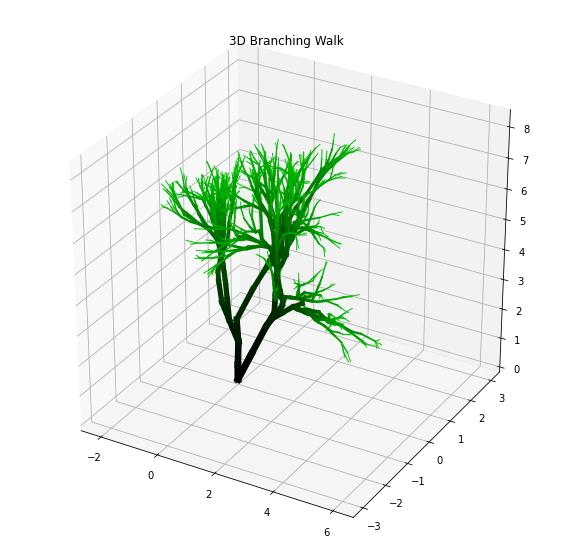

In [ ]:
%matplotlib inline
# Color_0 colors the base of the tree, color_1 colors the leaves, I use linear interpolation between
# Set use_custom_color to False to get rainbow trees
color_0 = np.array([0, 0, 0])
color_1 = np.array([0, 200, 0])
plot_branching_walk_3d(branching_walk, "3D Branching Walk", steps, thickness_0=7, thickness_1=0.5, use_custom_color=True, color_0=color_0, color_1=color_1)

Here we generate the interactive 3D plot using plotly. This was done so that we could see what the structure of the tree was like much more clearly. Plus, it's just fun.

In [ ]:
color_0 = np.array([0, 0, 0])
color_1 = np.array([0, 200, 0])
plot_branching_walk_3d_plotly(branching_walk, steps, 15, 0.5, use_custom_color=True, color_0=color_0, color_1=color_1)

## Generating, Combining, and Displaying Images with PIL

We want to generate a 2000x2000 image using 4 sub-images.

Each will be 1000x1000 and needs to be placed into a quarter of the full image. The function `combine_images` below does this for square images.

In [39]:
def combine_images(im1, im2, im3, im4):
  """
  Stitch together four square numpy array images.
  They are arranged as:
  im1 |  im2
  ----------
  im3 |  im4
  """
  #print(im1.shape, im2.shape, im3.shape, im4.shape)
  n = im1.shape[0]
  combined_image = np.zeros((2*n, 2*n, 4), dtype=np.uint8)
  images = [[im1, im2], [im3, im4]]
  for i in range(2):
    for j in range(2):
      img = images[i][j]
      for k in range(n):
        for l in range(n):
          combined_image[l+n*i, k+n*j] = img[l, k]
  return combined_image

In the code below, we run the generation function for each of the 4 sub-images and combine them into one array. The beauty of randomness is that everytime the code is run the final image will be different. Feel free to run it a few times to see different outcomes. Sometimes the images can look quite different indeed. To see the different images, simply run the code block below, then run the combination block and the block which displays the combined array in the section below.

In [43]:
# Generate 1st image
RW_1D_array = generate_1D_RW_image_array(750, "1D_RW.png")

# Generate 2nd image
rigid_array = generate_2D_Rigid_RW_array(0, 0, 1000, "2D_Rigid_RW.png")

# Generate 3rd image
thetas = np.linspace(0, 2*np.pi, 15, endpoint=False)
influence=np.pi/3
color_0=np.array([255, 0, 0])
color_1=np.array([0, 0, 255])
bg_color = np.array([0, 0, 0])
linewidth = 4
steps = 50
fig_size = (10, 10)
radial_array = generate_radial_random_walk(steps, thetas, influence, fig_size, bg_color, color_0, color_1, linewidth, fp="Radial_RW.png", save_dpi=100)

# Generate 4th image
# Parameters which generate the branching walk
sp = np.array([0, 0])
theta_0 = np.pi/2
theta_influence = np.pi/2
variance = np.pi/15
p_branch = 0.5
steps = 15
step_size = 1
step_var = 0.25
# Parameters for the plotting
# color_0 colors the base, color_1 colors the leaves. I use linear interpolation between them
# Set use_custom_color to False to get a rainbow tree
# bg_color sets the color of the background
bg_color = np.array([0, 0, 0])
color_0 = np.array([225, 225, 225])
color_1 = np.array([35, 35, 35])
thickness_0=15
thickness_1=0.5
fig_size = (10, 10)
# Generate image array
# With 10 inch square and 100 dpi, image is 1000x1000 pixels
branching_array = generate_branching_walk_array(sp, theta_0, theta_influence, variance, p_branch, steps, step_size, step_var,
                                                fig_size, bg_color, thickness_0, thickness_1, use_custom_color=True, color_0=color_0, color_1=color_1,
                                                fp="2DBranchingRW.png", save_dpi=100)

##Final Pictures


### Matplotlib

We can use Matplotlib to look at 1000 distances and endpoints of the uniform random walk see to the distribution.

In [ ]:
d_sequence = []
end_sequence = []
x_plot=[]
y_plot=[]
for i in range (0,1000):
  x_end, y_end = random_walk_uniform()
  x_plot.append(x_end[-1])
  y_plot.append(y_end[-1])
for n in range (0,len(x_plot)):
  d_sequence.append(np.sqrt((x_plot[n])**2+(y_plot[n])**2))

Here is our final Matplotlib image. In it, we plot a histogram of the distances attained by each of those 1000 random walks. Next to that, we plot the endpoints of each walk. The color of the endpoint represents the distance away from the origin. Blue dots are those which ended up quite close to the starting point and red dots are those which ended far away. The yellow circle is a circle with radius equal to the average displacement of all walks.

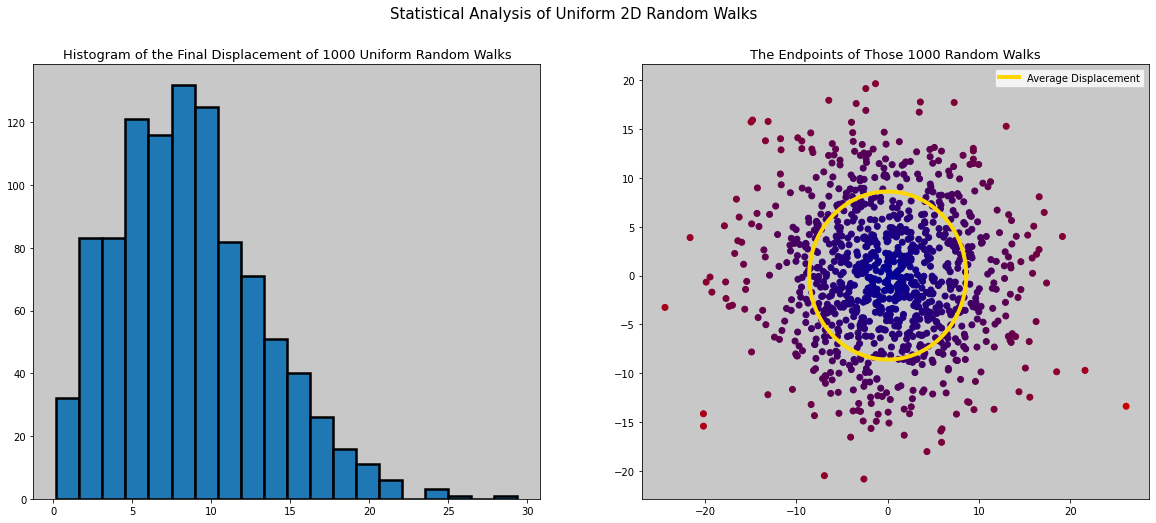

In [108]:
axis_facecolor = np.array([200, 200, 200])/255
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Statistical Analysis of Uniform 2D Random Walks", fontsize = 15)
fig.set_size_inches(20, 8)
ax1.hist(d_sequence, bins=20, linewidth=2.5, edgecolor='black')
ax1.set_facecolor(axis_facecolor)
ax1.set_title("Histogram of the Final Displacement of 1000 Uniform Random Walks", fontsize=13)
# For the second subplot, we color based on distance from the origin
max_d = np.max(d_sequence)
min_d = np.min(d_sequence)
avg_d = np.mean(d_sequence)
#color_1 = np.array([0, 200, 150])/255.
#color_0 = np.array([0, 25, 15])/255.
color_0 = np.array([0, 0, 150])/255.
color_1 = np.array([200, 0, 0])/255.
color_array = np.zeros((len(d_sequence), 3))
for i in range(len(d_sequence)):
  color_array[i] = ((color_1-color_0)/(max_d-min_d))*(d_sequence[i]-min_d) + color_0
ax2.scatter(x_plot, y_plot, c=color_array)
theta = np.linspace(0, 2*np.pi, 100)
ax2.plot(avg_d*np.cos(theta), avg_d*np.sin(theta), c='gold', label='Average Displacement', linewidth=4)
ax2.set_title("The Endpoints of Those 1000 Random Walks", fontsize=13)
ax2.legend()
ax2.set_facecolor(axis_facecolor)
plt.show()

Below we print the maximum, minimum, and average displacements over those 1000 random walks

In [90]:
print("The maximum displacement attained over the 1000 random walks was {:.3f}".format(max_d))
print("The minimum displacement attained over the 1000 random walks was {:.3f}".format(min_d))
print("The average displacement attained over the 1000 random walks, and radius of the circle above, was {:.3f}".format(avg_d))

The maximum displacement attained over the 1000 random walks was 29.365
The minimum displacement attained over the 1000 random walks was 0.185
The average displacement attained over the 1000 random walks, and radius of the circle above, was 8.608


### PIL

Here is our final picture using PIL. We have combined the 4 main images we generated above into one summary of the interesting experiments we ran. 

The first image, the one in the upper left corner, is a representation of a one dimensional random walk. This is where we started and represents the simplest version of a random walk. In the image, we start 3 different random walks from equally spaced origins on the real number line. Then, each progresses either one unit in the positive direction or one unit in the negative direction for 500 steps. The vertical axis of the image represents the location of the 1D walk on the number line. The horizontal axis of the image represents the step progression from the first step on the left to the last step on the right.

The lower left image is the second image we generated. It is a rigid random walk in two dimensions. That is, each step in the x and y direction was chosen uniformly from the options -1, 0, and 1. We call this rigid since the only possible movements are horizontally, vertically, and diagonally. Hence, the walk generates lots of geometric shapes, such as triangles, diamonds, squares, and more. This is a more intricate random walk than the simple 1D case, but is still restricted by the possible options presented for step size.

The upper right image is a two dimensional radial random walk, making use of the code we wrote to influence the direction of a random walk. This is the third image we generated. In this image, 15 equally spaced directions are chosen from 0 degrees to 360. Then, we send a random walk out along each direction. The random walks are able to pick any direction in the plane by choosing a point on the unit circle centered at the previous point in which to head to next. However, we influence the direction in which the random walks go by choosing this point based on a normal distribution centered at the initial angle we sent the walk at, with a given standard deviation. The end result is a walk which takes random steps, but is more likely to follow a given direction. In this sub-image, it is possible to see some of the walks taking steps backward, but if one looks at if from further away, it is clear that the walks tend in the initial direction they were given.

The lower right image is our final one. It shows a recursively generated 2D branching walk. This walk has the capability of forming the most complex shapes, since it can move in any direction, but also has the ability to branch at each step. This random walk is generated by specifying an initial direction for the walk to take and the strength of the influence that direction should have on the steps. Then, a new step is randomly chosen and it passes its direction and that strength of influence on to the next step, which repeats the process. At each step, there is a probability of branching. If this occurs, then the branch is generated using the same rules, just with a new direction. In this way, each branch is a full tree, simply generated under slightly different rules and with progressively smaller height. Eventually, it reaches the last step and the process returns. In the image below, we wanted to get a more natural looking structure. The strength of the influence of previous angles on the next step has a strong effect on how natural the structure looks. Therefore, we have relatively high influence used to generate the image here. With low influence, the branches can wrap back along themselves and even head below the root of the structure, leading to a more jumbled walk.

Again, the nature of randomness tells us that the image will be different every time it is generated. To try out different images, simply re-run the array generation code in the last block of the previous section, then run the next two code blocks again.

Combine the four 1000x1000 pixel arrays generated above to get a final image with resolution 2000x2000 pixels.

In [44]:
combination = combine_images(RW_1D_array, radial_array, rigid_array, branching_array)
print(combination.shape)

(2000, 2000, 4)


Display the final PIL image.

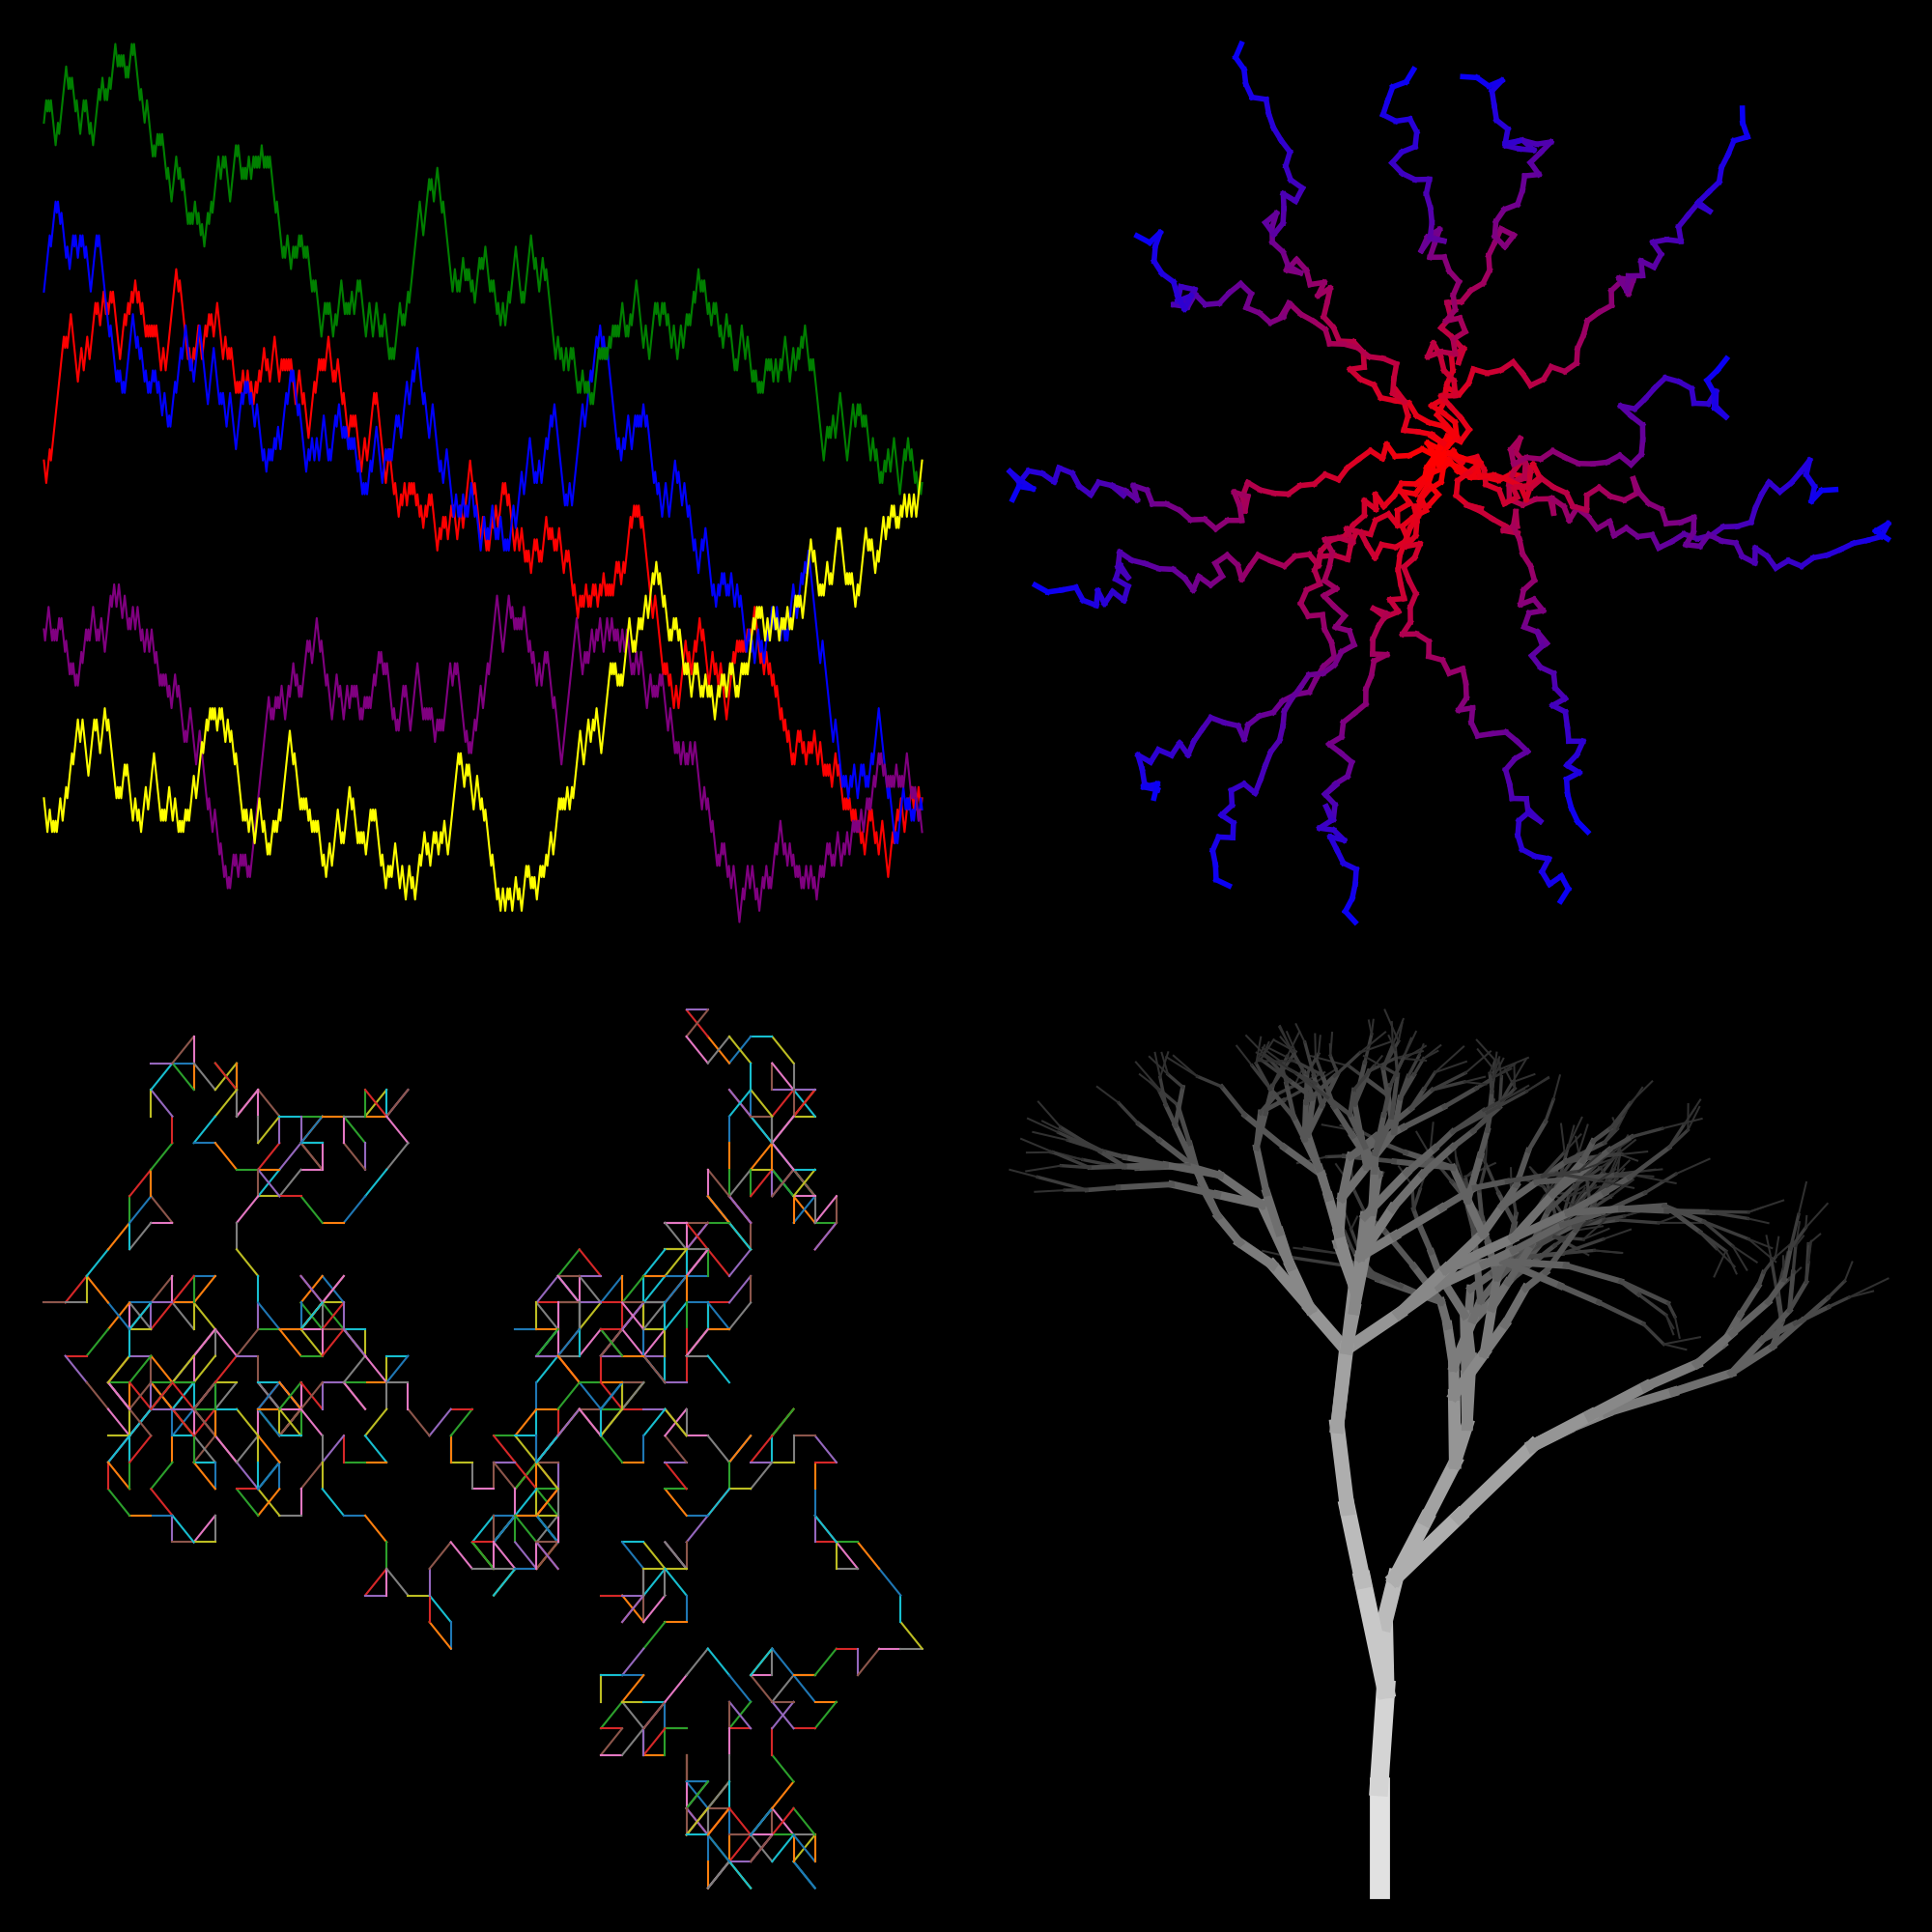

In [45]:
combined_image = Image.fromarray(combination)
display(combined_image)

In [42]:
# For saving the final image
combined_image.save("Final_PIL_Image.png")

##Randomness in Computers
As we have mentioned, the generation of truly random numbers is a big question. For the sake of creating an encrpytion system that can't be broken is extremely important, but for the sake of generating a random walk, we can use a 'semi random' number as opposed to a truly random one. 

Since numbers generated by computers are produced algorithmically, there is no way to make a truly random number without external data. Interstingly, for true randon numbers, our computers, our systems will use data that comes from us, such as our keystrokes, mouse movement, and even information on the network to make the outcome as hard to predict as possible.

Again, for our usage, our semi random numbers will suffice. Semi random numbers are produced using seeds, or initial values in order to run an algorithm, and thus simulate randomness.

##Sources
https://docs.python.org/3/library/random.html

https://numpy.org/doc/
